In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np

In [2]:
train_file = pd.read_csv("train.csv")
test_file = pd.read_csv("test.csv")

In [3]:
train_file.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
clean_title_num = []
for i in train_file['clean_title']:
    if i == 'Yes':
        clean_title_num += [1]
    else:
        clean_title_num += [0]

In [6]:
def to_gaussian(data, desired_mean=0, desired_std=1):
    # Step 1: Normalize the data
    normalized_data = (data - np.mean(data)) / np.std(data)
    
    # Step 2: Scale the normalized data to the desired Gaussian distribution
    gaussian_data = normalized_data * desired_std + desired_mean
    
    return gaussian_data

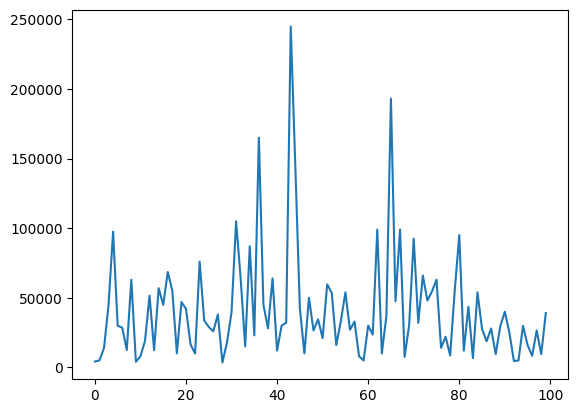

In [7]:
plt.plot([i for i in range(len(train_file['price']))][:100], train_file['price'][:100])

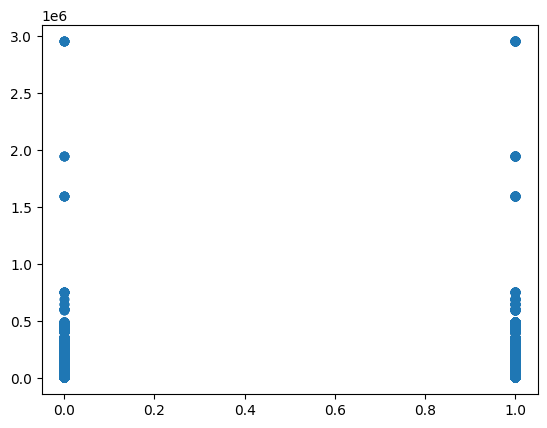

In [8]:
plt.scatter(clean_title_num, train_file['price'])

In [9]:
train_file['price'].corr(pd.Series(clean_title_num))

-0.08943269629433133

In [10]:
train_file['price'].corr(train_file['model_year']), train_file['price'].corr(train_file['milage'])

(0.23179481548140715, -0.2830674944363226)

In [11]:
train_file['accident'].unique()

array(['None reported', 'At least 1 accident or damage reported', nan],
      dtype=object)

In [12]:
acc_num = []
for i in train_file['accident']:
    if i == 'None reported':
        acc_num += [1]
    elif i == 'At least 1 accident or damage reported':
        acc_num += [0]
    else: 
        acc_num += [np.nan]

In [13]:
train_file['price'].corr(pd.Series(acc_num))

0.12576183990987327

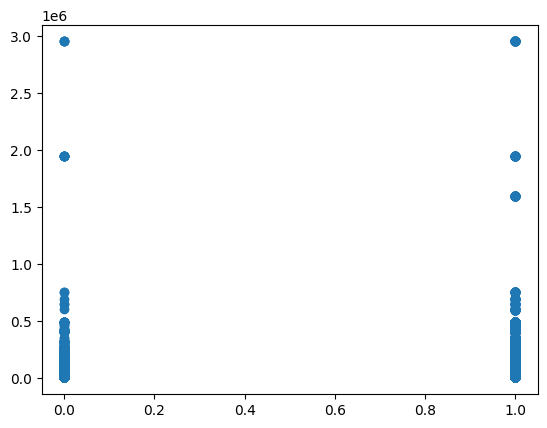

In [14]:
plt.scatter(acc_num, train_file['price'])

In [15]:
train_file['int_col'].unique(), train_file['ext_col'].unique()

(array(['Gray', 'Beige', 'Black', '–', 'Blue', 'White', 'Red', 'Brown',
        'Dark Galvanized', 'Parchment.', 'Boulder', 'Orange',
        'Medium Earth Gray', 'Ebony', 'Canberra Beige', 'Jet Black',
        'Silver', 'Light Platinum / Jet Black', 'Macchiato/Magmagrey',
        'Gold', 'Cloud', 'Rioja Red', 'Global Black', 'Green',
        'Medium Stone', 'Navy Pier', 'Dark Ash', 'BLACK', 'Portland',
        'Sandstone', 'Canberra Beige/Black', 'Diesel Gray / Black',
        'Sarder Brown', 'Black Onyx', 'White / Brown', 'Black/Gun Metal',
        'Slate', 'Satin Black', 'Macchiato Beige/Black', 'Charcoal',
        'Black / Express Red', 'Cappuccino', 'Aragon Brown', 'Parchment',
        'Oyster W/Contrast', 'Adrenaline Red', 'Ebony.', 'Shara Beige',
        'Graystone', 'Pearl Beige', 'Nero Ade', 'Graphite',
        'Tan/Ebony/Ebony', 'Charcoal Black', 'Medium Ash Gray',
        'Ebony Black', 'Light Titanium', 'Sakhir Orange', 'Tan',
        'Rock Gray', 'Brandy', 'Carbon Black', 

In [16]:
train_file['transmission'].unique()

array(['A/T', 'Transmission w/Dual Shift Mode', '7-Speed A/T',
       '8-Speed A/T', '10-Speed Automatic', '1-Speed A/T', '6-Speed A/T',
       '10-Speed A/T', '9-Speed A/T', '8-Speed Automatic',
       '9-Speed Automatic', '5-Speed A/T', 'Automatic',
       '7-Speed Automatic with Auto-Shift', 'CVT Transmission',
       '5-Speed M/T', 'M/T', '6-Speed M/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T', '2-Speed A/T',
       '1-Speed Automatic', 'Automatic CVT', '4-Speed A/T',
       '6-Speed Manual', 'Transmission Overdrive Switch',
       '8-Speed Automatic with Auto-Shift', '7-Speed Manual',
       '7-Speed Automatic', '9-Speed Automatic with Auto-Shift',
       '6-Speed Automatic with Auto-Shift',
       '6-Speed Electronically Controlled Automatic with O', 'F', 'CVT-F',
       '8-Speed Manual', 'Manual', '–', '2', '6 Speed At/Mt',
       '5-Speed Automatic', '2-Speed Automatic', '8-SPEED A/T', '7-Speed',
       'Variable', 'Single-Speed Fixed Gear', '8-SPEED AT',


In [17]:
brand_field = train_file['brand'].copy(deep = False)

In [18]:
brand_field.unique()

array(['MINI', 'Lincoln', 'Chevrolet', 'Genesis', 'Mercedes-Benz', 'Audi',
       'Ford', 'BMW', 'Tesla', 'Cadillac', 'Land', 'GMC', 'Toyota',
       'Hyundai', 'Volvo', 'Volkswagen', 'Buick', 'Rivian', 'RAM',
       'Hummer', 'Alfa', 'INFINITI', 'Jeep', 'Porsche', 'McLaren',
       'Honda', 'Lexus', 'Dodge', 'Nissan', 'Jaguar', 'Acura', 'Kia',
       'Mitsubishi', 'Rolls-Royce', 'Maserati', 'Pontiac', 'Saturn',
       'Bentley', 'Mazda', 'Subaru', 'Ferrari', 'Aston', 'Lamborghini',
       'Chrysler', 'Lucid', 'Lotus', 'Scion', 'smart', 'Karma',
       'Plymouth', 'Suzuki', 'FIAT', 'Saab', 'Bugatti', 'Mercury',
       'Polestar', 'Maybach'], dtype=object)

In [19]:
# luxury_car_brands = ['Genesis', 'Mercedes-Benz', 'Audi',
#        'BMW', 'Tesla', 
#        'Alfa', 'Porsche', 'McLaren',
#        'Lexus', 'Jaguar', 'Acura',
#        'Rolls-Royce', 'Maserati', 'Pontiac', 'Saturn',
#        'Bentley','Ferrari', 'Aston', 'Lamborghini',
#        'Bugatti', 'Maybach']

luxury_car_brands = ['Genesis', 'Mercedes-Benz',
       'Alfa', 'Porsche', 'McLaren',
       'Rolls-Royce', 'Maserati',
       'Bentley','Ferrari', 'Aston', 'Lamborghini',
       'Bugatti', 'Maybach']

In [20]:
lux_brand = []

for i in brand_field:
    if i in luxury_car_brands:
        lux_brand += [1]
    else:
        lux_brand += [0]

lux_brand = pd.Series(lux_brand)
train_file['lux_brand'] = lux_brand

In [21]:
train_file['price'].corr(lux_brand)

0.13139138742042922

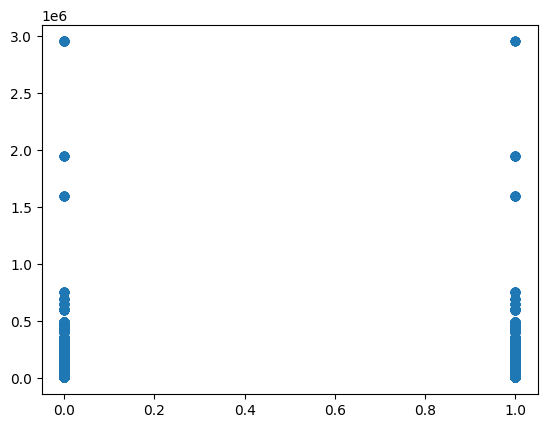

In [22]:
plt.scatter(lux_brand, train_file['price'])

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
label_encoder = LabelEncoder()
train_file['transmission'] = label_encoder.fit_transform(train_file['transmission'])
train_file['int_col'] = label_encoder.fit_transform(train_file['int_col'])
train_file['ext_col'] = label_encoder.fit_transform(train_file['ext_col'])
train_file['brand'] = label_encoder.fit_transform(train_file['brand'])
train_file['model'] = label_encoder.fit_transform(train_file['model'])
train_file['fuel_type'] = label_encoder.fit_transform(train_file['fuel_type'])

In [25]:
train_file['price'].corr(train_file['int_col']), train_file['price'].corr(train_file['ext_col']), train_file['price'].corr(train_file['transmission'])

(0.0351742787669496, -0.017342458829587296, 0.014559692757927492)

In [26]:
train_file['price'].corr(train_file['brand']), train_file['price'].corr(train_file['model']), train_file['price'].corr(train_file['fuel_type'])

(0.01765717358665254, -0.029865297620207554, 0.03859585912117763)

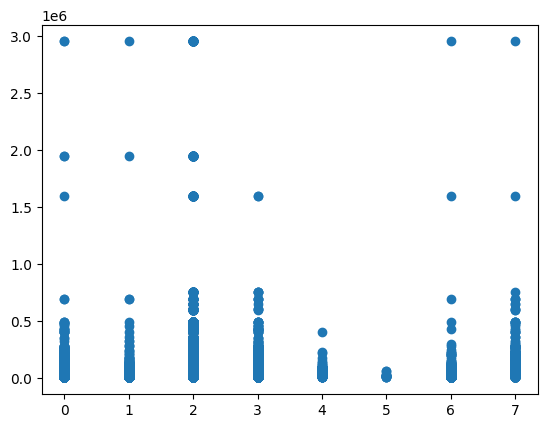

In [27]:
plt.scatter(train_file['fuel_type'], train_file['price'])

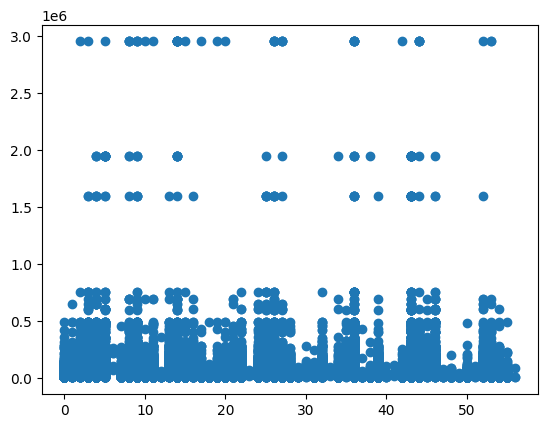

In [28]:
plt.scatter(train_file['brand'], train_file['price'])

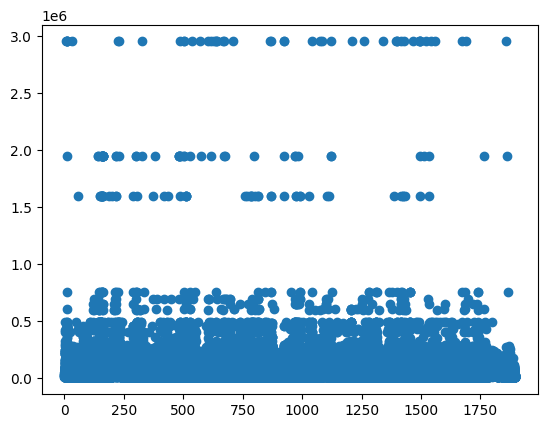

In [29]:
plt.scatter(train_file['model'], train_file['price'])

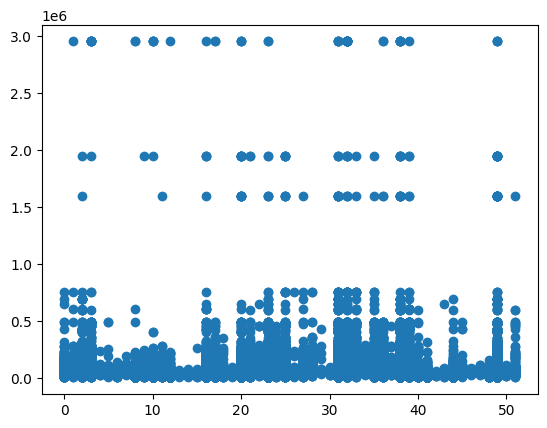

In [30]:
plt.scatter(train_file['transmission'], train_file['price'])

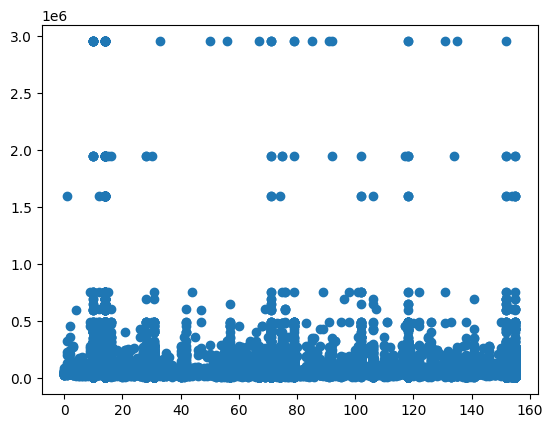

In [31]:
plt.scatter(train_file['int_col'], train_file['price'])

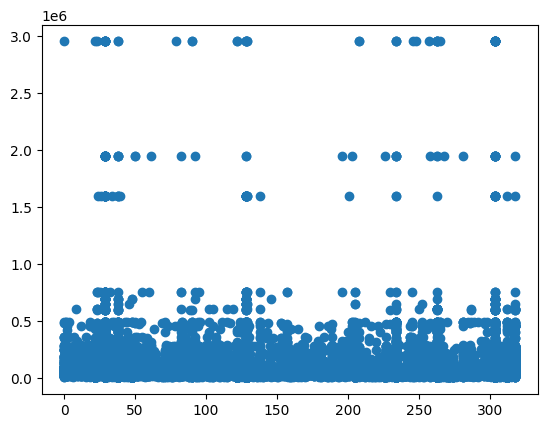

In [32]:
plt.scatter(train_file['ext_col'], train_file['price'])

In [33]:
train_file['engine'].unique(), train_file['engine'].isna().sum()

(array(['172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel',
        '252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel',
        '320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability', ...,
        '78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel',
        '139.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas',
        '313.0HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas'],
       dtype=object),
 0)

In [34]:
hp = []
capacity = []
cylin_cnt = []
for i in train_file['engine']:
    strs = i.split()
    
    # Extracting horsepower (e.g., "172.0HP")
    try:
        hp_value = strs[0].replace("HP", "")  # Remove "HP" from the string
        hp.append(float(hp_value))  # Convert to float and append
    except ValueError as e:
        print(f"Error converting horsepower: {e}")
        hp.append(np.nan)  # Append NaN if conversion fails

    # Extracting capacity (e.g., "1.6L")
    try:
        if len(strs) > 1 and 'L' in strs[1]:
            capacity_value = strs[1].replace("L", "")  # Remove "L"
            capacity.append(float(capacity_value))  # Convert to float and append
        else:
            capacity.append(np.nan)  # Append NaN if no valid capacity is found
    except ValueError as e:
        print(f"Error converting capacity: {e}")
        capacity.append(np.nan)  # Append NaN if conversion fails

    # Extracting cylinder count (e.g., "4 Cylinder")
    try:
        if len(strs) > 2:
            cylinder_string = strs[2]  # Extract the cylinder string
            if cylinder_string.isdigit():  # Check if it's a digit
                cylin_cnt.append(int(cylinder_string))  # Append as int
            else:
                cylin_cnt.append(np.nan)  # Append NaN if not a valid number
        else:
            cylin_cnt.append(np.nan)  # Append NaN if no valid cylinder count is found
    except ValueError as e:
        print(f"Error converting cylinder count: {e}")
        cylin_cnt.append(np.nan)  # Append NaN if conversion fails

# Adding new columns to the DataFrame
train_file['hp'] = pd.Series(hp)
train_file['capacity'] = pd.Series(capacity)
train_file['cylin_cnt'] = pd.Series(cylin_cnt)


Error converting horsepower: could not convert string to float: '2.7L'
Error converting horsepower: could not convert string to float: 'Electric'
Error converting horsepower: could not convert string to float: '5.2L'
Error converting horsepower: could not convert string to float: '3.6L'
Error converting horsepower: could not convert string to float: '4.0L'
Error converting horsepower: could not convert string to float: '5.7L'
Error converting horsepower: could not convert string to float: 'Dual'
Error converting horsepower: could not convert string to float: '3.0L'
Error converting horsepower: could not convert string to float: '3.8L'
Error converting horsepower: could not convert string to float: '3.4L'
Error converting horsepower: could not convert string to float: '3.5L'
Error converting horsepower: could not convert string to float: '2.0L'
Error converting horsepower: could not convert string to float: '2.4L'
Error converting capacity: could not convert string to float: 'iter'
Erro

In [35]:
train_file['price'].corr(train_file['hp']), train_file['price'].corr(train_file['capacity']), train_file['price'].corr(train_file['cylin_cnt'])

(0.20177966921919455, 0.09382889730909821, 0.16269222997095686)

In [36]:
train_file['price'].corr((train_file['capacity'] < train_file['capacity'].mean()).astype(int))

-0.1163853398635172

In [37]:
train_file.loc[train_file.duplicated(subset=list(train_file.columns).remove('price')) == True]

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,lux_brand,hp,capacity,cylin_cnt


In [38]:
train_file.isna().sum()

id                   0
brand                0
model                0
model_year           0
milage               0
fuel_type            0
engine               0
transmission         0
ext_col              0
int_col              0
accident          2452
clean_title      21419
price                0
lux_brand            0
hp               25803
capacity         37886
cylin_cnt       104322
dtype: int64

In [39]:
train_file = train_file[train_file['accident'].isna() == False]

In [40]:
train_file.drop('clean_title', axis = 1, inplace=True)

In [41]:
train_file['cylin_cnt'].fillna(train_file['cylin_cnt'].median(), inplace=True)

C:\Users\amazi\AppData\Local\Temp\ipykernel_11120\4195526635.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_file['cylin_cnt'].fillna(train_file['cylin_cnt'].median(), inplace=True)


In [42]:
train_file.fillna({'hp': train_file['hp'].median()}, inplace=True)
train_file.fillna({'capacity': train_file['capacity'].median()}, inplace=True)

In [43]:
train_file.drop('id', axis = 1, inplace = True)
train_file.drop('brand', axis = 1, inplace = True)
train_file.drop('model', axis = 1, inplace = True)
train_file.drop('engine', axis = 1, inplace = True)
train_file.drop('transmission', axis = 1, inplace = True)
train_file.drop('ext_col', axis = 1, inplace = True)
train_file.drop('int_col', axis = 1, inplace = True)

In [44]:
train_file.head()

,model_year,milage,fuel_type,accident,price,lux_brand,hp,capacity,cylin_cnt
0,2007,213000,2,None reported,4200,0,172.0,1.6,4.0
1,2002,143250,2,At least 1 accident or damage reported,4999,0,252.0,3.9,8.0
2,2002,136731,1,None reported,13900,0,320.0,5.3,8.0
3,2017,19500,2,None reported,45000,1,420.0,5.0,8.0
4,2021,7388,2,None reported,97500,1,208.0,2.0,4.0


In [45]:
train_file['accident'] = LabelEncoder().fit_transform(train_file['accident'])

In [46]:
train_file.head()

,model_year,milage,fuel_type,accident,price,lux_brand,hp,capacity,cylin_cnt
0,2007,213000,2,1,4200,0,172.0,1.6,4.0
1,2002,143250,2,0,4999,0,252.0,3.9,8.0
2,2002,136731,1,1,13900,0,320.0,5.3,8.0
3,2017,19500,2,1,45000,1,420.0,5.0,8.0
4,2021,7388,2,1,97500,1,208.0,2.0,4.0


In [47]:
train_file.reset_index(drop=True, inplace = True)

In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

In [49]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [50]:
class CustomDataset(Dataset):
    def __init__(self, dataframe):
        super().__init__()
        self.data = dataframe
        self.model_year = self.data.model_year
        self.milage = self.data.milage
        self.fuel_type = self.data.fuel_type
        self.accident = self.data.accident
        self.price = self.data.price
        self.lux_brand = self.data.lux_brand
        self.hp = self.data.hp
        self.capacity = self.data.capacity
        self.cylin_cnt= self.data.cylin_cnt

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return {'x':
            {'model_year':torch.tensor(self.model_year.iloc[idx], dtype=torch.int).to(device),
            'milage':torch.tensor(self.milage.iloc[idx], dtype=torch.int).to(device),
            'fuel_type':torch.tensor(self.fuel_type.iloc[idx], dtype=torch.int).to(device),
            'accident':torch.tensor(self.accident.iloc[idx], dtype=torch.int).to(device),
            'lux_brand':torch.tensor(self.lux_brand.iloc[idx], dtype=torch.int).to(device),
            'hp':torch.tensor(self.hp.iloc[idx], dtype=torch.float).to(device),
            'capacity':torch.tensor(self.capacity.iloc[idx], dtype=torch.float).to(device),
            'cylin_cnt':torch.tensor(self.cylin_cnt.iloc[idx], dtype=torch.int).to(device)},
            'y': {'price':torch.tensor(self.price.iloc[idx], dtype=torch.float),}
        }

In [51]:
train_set = CustomDataset(train_file)

In [52]:
train_loader = DataLoader(train_set, batch_size= 128, shuffle=True)

In [53]:
class CustomModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 256)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(256, 1024)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(1024, 512)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(512, 64)
        self.relu5 = nn.ReLU()
        self.fc6 = nn.Linear(64, 1)
        self.relu6 = nn.ReLU()

    def forward(self, x):
        op1 = self.relu1(self.fc1(x))
        op2 = self.relu2(self.fc2(op1))
        op3 = self.relu3(self.fc3(op2))
        op4 = self.relu4(self.fc4(op3))
        op5 = self.relu5(self.fc5(op4))
        op6 = self.relu6(self.fc6(op5))

        return op6

In [54]:
model = CustomModel(8).to(device)
lossfn = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr = 5e-3)

In [57]:
model.train()
epochs = 10
for epoch in range(epochs):
    total_loss = 0
    cnt = 0
    for (idx, batch) in enumerate(train_loader):
        input = batch['x']
        target = batch['y']['price'].unsqueeze(1).to(device)
        input_tensor = torch.cat((
            input['model_year'].unsqueeze(1).to(device),
            input['milage'].unsqueeze(1).to(device),
            input['fuel_type'].unsqueeze(1).to(device),
            input['accident'].unsqueeze(1).to(device),
            input['lux_brand'].unsqueeze(1).to(device),
            input['hp'].unsqueeze(1).to(device),
            input['capacity'].unsqueeze(1).to(device),
            input['cylin_cnt'].unsqueeze(1).to(device),
        ), dim=1)
        outputs = model(input_tensor)
        loss = lossfn(outputs, target)
        total_loss += loss.item()
        cnt += 1
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch: {epoch} | Loss: {total_loss/cnt:.3f}')

KeyboardInterrupt: 

In [ ]:
lux_brand = []

for i in test_file['brand']:
    if i in luxury_car_brands:
        lux_brand += [1]
    else:
        lux_brand += [0]

lux_brand = pd.Series(lux_brand)
test_file['lux_brand'] = lux_brand

In [ ]:
test_file = test_file[test_file['accident'].isna() == False]

In [ ]:
hp = []
capacity = []
cylin_cnt = []
for i in test_file['engine']:
    strs = i.split()
    
    # Extracting horsepower (e.g., "172.0HP")
    try:
        hp_value = strs[0].replace("HP", "")  # Remove "HP" from the string
        hp.append(float(hp_value))  # Convert to float and append
    except ValueError as e:
        print(f"Error converting horsepower: {e}")
        hp.append(np.nan)  # Append NaN if conversion fails

    # Extracting capacity (e.g., "1.6L")
    try:
        if len(strs) > 1 and 'L' in strs[1]:
            capacity_value = strs[1].replace("L", "")  # Remove "L"
            capacity.append(float(capacity_value))  # Convert to float and append
        else:
            capacity.append(np.nan)  # Append NaN if no valid capacity is found
    except ValueError as e:
        print(f"Error converting capacity: {e}")
        capacity.append(np.nan)  # Append NaN if conversion fails

    # Extracting cylinder count (e.g., "4 Cylinder")
    try:
        if len(strs) > 2:
            cylinder_string = strs[2]  # Extract the cylinder string
            if cylinder_string.isdigit():  # Check if it's a digit
                cylin_cnt.append(int(cylinder_string))  # Append as int
            else:
                cylin_cnt.append(np.nan)  # Append NaN if not a valid number
        else:
            cylin_cnt.append(np.nan)  # Append NaN if no valid cylinder count is found
    except ValueError as e:
        print(f"Error converting cylinder count: {e}")
        cylin_cnt.append(np.nan)  # Append NaN if conversion fails

# Adding new columns to the DataFrame
test_file['hp'] = pd.Series(hp)
test_file['capacity'] = pd.Series(capacity)
test_file['cylin_cnt'] = pd.Series(cylin_cnt)

In [ ]:
label_encoder = LabelEncoder()
test_file['transmission'] = label_encoder.fit_transform(test_file['transmission'])
test_file['int_col'] = label_encoder.fit_transform(test_file['int_col'])
test_file['ext_col'] = label_encoder.fit_transform(test_file['ext_col'])
test_file['brand'] = label_encoder.fit_transform(test_file['brand'])
test_file['model'] = label_encoder.fit_transform(test_file['model'])
test_file['fuel_type'] = label_encoder.fit_transform(test_file['fuel_type'])
test_file['accident'] = label_encoder.fit_transform(test_file['accident'])

In [ ]:
test_file['cylin_cnt'].fillna(test_file['cylin_cnt'].median(), inplace=True)

In [ ]:
test_file.fillna({'hp': test_file['hp'].median()}, inplace=True)
test_file.fillna({'capacity': test_file['capacity'].median()}, inplace=True)

In [ ]:
test_file.reset_index(drop=True, inplace = True)

In [ ]:
class CustomtestDataset(Dataset):
    def __init__(self, dataframe):
        super().__init__()
        self.data = dataframe
        self.model_year = self.data.model_year
        self.milage = self.data.milage
        self.fuel_type = self.data.fuel_type
        self.accident = self.data.accident
        self.lux_brand = self.data.lux_brand
        self.hp = self.data.hp
        self.capacity = self.data.capacity
        self.cylin_cnt= self.data.cylin_cnt

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return {'x':
            {'model_year':torch.tensor(self.model_year.iloc[idx], dtype=torch.int).to(device),
            'milage':torch.tensor(self.milage.iloc[idx], dtype=torch.int).to(device),
            'fuel_type':torch.tensor(self.fuel_type.iloc[idx], dtype=torch.int).to(device),
            'accident':torch.tensor(self.accident.iloc[idx], dtype=torch.int).to(device),
            'lux_brand':torch.tensor(self.lux_brand.iloc[idx], dtype=torch.int).to(device),
            'hp':torch.tensor(self.hp.iloc[idx], dtype=torch.float).to(device),
            'capacity':torch.tensor(self.capacity.iloc[idx], dtype=torch.float).to(device),
            'cylin_cnt':torch.tensor(self.cylin_cnt.iloc[idx], dtype=torch.int).to(device)},
        }

In [ ]:
test_set = CustomtestDataset(test_file)
test_loader = DataLoader(test_set, batch_size= 128, shuffle= False)

In [ ]:
model.eval()
final_outputs = []
with torch.no_grad():
    for (idx, batch) in enumerate(test_loader):
        input = batch['x']
        input_tensor = torch.cat((
            input['model_year'].unsqueeze(1).to(device),
            input['milage'].unsqueeze(1).to(device),
            input['fuel_type'].unsqueeze(1).to(device),
            input['accident'].unsqueeze(1).to(device),
            input['lux_brand'].unsqueeze(1).to(device),
            input['hp'].unsqueeze(1).to(device),
            input['capacity'].unsqueeze(1).to(device),
            input['cylin_cnt'].unsqueeze(1).to(device),
        ), dim=1)
        outputs = model(input_tensor)
        final_outputs += outputs.detach().cpu().tolist()